In [1]:
import os
os.environ['OMP_NUM_THREADS']='1'

import numpy as np
import matplotlib.pyplot as plt

from pyttn import generate_spanning_tree, generate_hierarchical_clustering_tree, convert_nx_to_tree, ntree


/home/lachlan/pyttn/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


TypeError: generate_spanning_tree() got an unexpected keyword argument 'max_degree'

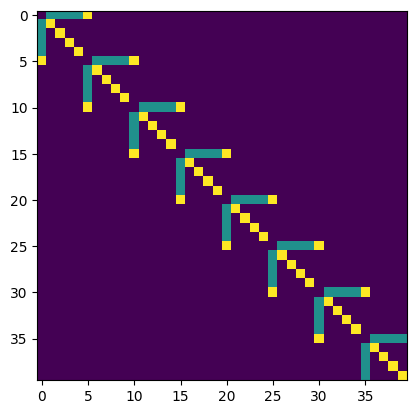

In [2]:
from pyttn.utils import visualise_tree


tree = ntree("(0(121))")
tree2 = ntree("(0(121))")

N=4
M=8
#G = nx.erdos_renyi_graph(N, 0.1)
#gamma = nx.to_numpy_array(G)
v = 0.5*np.ones(N)#np.random.uniform(0, 1, size=N)
w = np.diag(np.ones(N))#np.random.uniform(0, 1, size=(N)))
w = (w + w.T)/2.0
gamma = np.zeros((N+1, N+1))
gamma[0, 1:] = v
gamma[1:, 0] = v
gamma[1:, 1:] = w
gamma += 1e-15

G2 = np.zeros((M*(N+1),M*(N+1)))
for i in range(M):
   G2[i*(N+1):(i+1)*(N+1), i*(N+1):(i+1)*(N+1)]=gamma

for i in range(M-1):
   G2[i*(N+1), (i+1)*(N+1)] = 1
   G2[(i+1)*(N+1), i*(N+1)] = 1


plt.figure(1)
plt.imshow(G2)

spanning_tree, spanning_root_ind = generate_spanning_tree(G2, max_nchild=1, root_index=0)
clustering_tree, clustering_root_ind = generate_hierarchical_clustering_tree(G2)

tree, leaf_ordering = convert_nx_to_tree(spanning_tree, root_ind=spanning_root_ind)
print(leaf_ordering)
tree2, leaf_ordering2 = convert_nx_to_tree(clustering_tree, root_ind=clustering_root_ind)
print(leaf_ordering2)

plt.figure(2)
visualise_tree(tree, prog='dot')

plt.figure(3)
visualise_tree(tree2, prog='dot')